In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import matplotlib
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve,auc,roc_auc_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder
from pyod.models.auto_encoder import AutoEncoder
from tqdm import tqdm
from sklearn import metrics
import seaborn as sns
matplotlib.rcParams.update({'font.size': 30})
sns.set(style='whitegrid')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [3]:
trainData = pd.read_csv('./dayr4.2.csv')

In [12]:
import pyod
print(pyod.__version__)


2.0.5


In [17]:
LISANCOLUMNS = [2,11]
DROPCOLUMNS = []
LABELCOLUMNS = [507]
FEATURECOLUMNS = [i for i in range(trainData.shape[1]) if i not in DROPCOLUMNS and i not in LABELCOLUMNS]
FENLI = False
MODELNAME = "Isolation Forest"
MINSECTIONNUM1 = 50
MINSECTIONNUM2 = 1000
HIDDEN_NEURONS = [256,128,64,32,16,8,4,4,8,16,32,64,128,256]
GLOBALEPOCH = 100
LOCALEPOCH = 100
classifiers = {
        "Isolation Forest":IsolationForest(n_estimators=100, max_samples=int(len(trainData)*0.01) ,bootstrap=False,warm_start=True,random_state=6666,
                                    max_features = 1.0, verbose=0,n_jobs=-1),
        "AutoEncoder": AutoEncoder(hidden_neuron_list=HIDDEN_NEURONS,batch_size=1000,verbose=0)
        }

In [18]:
trainData.head()

,starttime,endtime,user,day,week,isweekday,isweekend,role,b_unit,f_unit,dept,team,ITAdmin,O,C,E,A,N,n_allact,allact_n-pc0,allact_n-pc1,allact_n-pc2,allact_n-pc3,n_workhourallact,workhourallact_n-pc0,workhourallact_n-pc1,workhourallact_n-pc2,workhourallact_n-pc3,n_afterhourallact,afterhourallact_n-pc0,afterhourallact_n-pc1,afterhourallact_n-pc2,afterhourallact_n-pc3,n_logon,logon_n-pc0,logon_n-pc1,logon_n-pc2,logon_n-pc3,n_workhourlogon,workhourlogon_n-pc0,workhourlogon_n-pc1,workhourlogon_n-pc2,workhourlogon_n-pc3,n_afterhourlogon,afterhourlogon_n-pc0,afterhourlogon_n-pc1,afterhourlogon_n-pc2,afterhourlogon_n-pc3,n_usb,usb_mean_usb_dur,usb_n-pc0,usb_n-pc1,usb_n-pc2,usb_n-pc3,n_workhourusb,workhourusb_mean_usb_dur,workhourusb_n-pc0,workhourusb_n-pc1,workhourusb_n-pc2,workhourusb_n-pc3,n_afterhourusb,afterhourusb_mean_usb_dur,afterhourusb_n-pc0,afterhourusb_n-pc1,afterhourusb_n-pc2,afterhourusb_n-pc3,n_file,file_mean_file_len,file_mean_file_depth,file_mean_file_nwords,file_n-disk0,file_n-disk1,file_n-pc0,file_n-pc1,file_n-pc2,file_n-pc3,file_n_otherf,file_otherf_mean_file_len,file_otherf_mean_file_depth,file_otherf_mean_file_nwords,file_otherf_n-disk0,file_otherf_n-disk1,file_otherf_n-pc0,file_otherf_n-pc1,file_otherf_n-pc2,file_otherf_n-pc3,file_n_compf,file_compf_mean_file_len,file_compf_mean_file_depth,file_compf_mean_file_nwords,file_compf_n-disk0,file_compf_n-disk1,file_compf_n-pc0,file_compf_n-pc1,file_compf_n-pc2,file_compf_n-pc3,file_n_phof,file_phof_mean_file_len,file_phof_mean_file_depth,file_phof_mean_file_nwords,...,workhourhttp_n_cloudf,workhourhttp_cloudf_mean_url_len,workhourhttp_cloudf_mean_url_depth,workhourhttp_cloudf_mean_http_c_len,workhourhttp_cloudf_mean_http_c_nwords,workhourhttp_cloudf_n-pc0,workhourhttp_cloudf_n-pc1,workhourhttp_cloudf_n-pc2,workhourhttp_cloudf_n-pc3,workhourhttp_n_jobf,workhourhttp_jobf_mean_url_len,workhourhttp_jobf_mean_url_depth,workhourhttp_jobf_mean_http_c_len,workhourhttp_jobf_mean_http_c_nwords,workhourhttp_jobf_n-pc0,workhourhttp_jobf_n-pc1,workhourhttp_jobf_n-pc2,workhourhttp_jobf_n-pc3,workhourhttp_n_leakf,workhourhttp_leakf_mean_url_len,workhourhttp_leakf_mean_url_depth,workhourhttp_leakf_mean_http_c_len,workhourhttp_leakf_mean_http_c_nwords,workhourhttp_leakf_n-pc0,workhourhttp_leakf_n-pc1,workhourhttp_leakf_n-pc2,workhourhttp_leakf_n-pc3,workhourhttp_n_hackf,workhourhttp_hackf_mean_url_len,workhourhttp_hackf_mean_url_depth,workhourhttp_hackf_mean_http_c_len,workhourhttp_hackf_mean_http_c_nwords,workhourhttp_hackf_n-pc0,workhourhttp_hackf_n-pc1,workhourhttp_hackf_n-pc2,workhourhttp_hackf_n-pc3,n_afterhourhttp,afterhourhttp_mean_url_len,afterhourhttp_mean_url_depth,afterhourhttp_mean_http_c_len,afterhourhttp_mean_http_c_nwords,afterhourhttp_n-pc0,afterhourhttp_n-pc1,afterhourhttp_n-pc2,afterhourhttp_n-pc3,afterhourhttp_n_otherf,afterhourhttp_otherf_mean_url_len,afterhourhttp_otherf_mean_url_depth,afterhourhttp_otherf_mean_http_c_len,afterhourhttp_otherf_mean_http_c_nwords,afterhourhttp_otherf_n-pc0,afterhourhttp_otherf_n-pc1,afterhourhttp_otherf_n-pc2,afterhourhttp_otherf_n-pc3,afterhourhttp_n_socnetf,afterhourhttp_socnetf_mean_url_len,afterhourhttp_socnetf_mean_url_depth,afterhourhttp_socnetf_mean_http_c_len,afterhourhttp_socnetf_mean_http_c_nwords,afterhourhttp_socnetf_n-pc0,afterhourhttp_socnetf_n-pc1,afterhourhttp_socnetf_n-pc2,afterhourhttp_socnetf_n-pc3,afterhourhttp_n_cloudf,afterhourhttp_cloudf_mean_url_len,afterhourhttp_cloudf_mean_url_depth,afterhourhttp_cloudf_mean_http_c_len,afterhourhttp_cloudf_mean_http_c_nwords,afterhourhttp_cloudf_n-pc0,afterhourhttp_cloudf_n-pc1,afterhourhttp_cloudf_n-pc2,afterhourhttp_cloudf_n-pc3,afterhourhttp_n_jobf,afterhourhttp_jobf_mean_url_len,afterhourhttp_jobf_mean_url_depth,afterhourhttp_jobf_mean_http_c_len,afterhourhttp_jobf_mean_http_c_nwords,afterhourhttp_jobf_n-pc0,afterhourhttp_jobf_n-pc1,afterhourhttp_jobf_n-pc2,afterhourhttp_jobf_n-pc3,afterhourhttp_n_leakf,afterhourhttp_leakf_mean_url_len,afterhourhttp_leakf_mean_url_depth,

In [19]:
if FENLI:
    testData = pd.read_csv("kddTest+.csv",error_bad_lines=False,header=None)

In [20]:
columnName = [i for i in range(trainData.shape[1])]

In [21]:
trainData.columns = [i for i in range(trainData.shape[1])]
trainData = trainData.reset_index(drop=True)

In [22]:
clf=classifiers[MODELNAME]
train_X=trainData.iloc[:,:-1]
clf.fit(train_X)

IsolationForest(max_samples=3304, n_jobs=-1, random_state=6666, warm_start=True)

In [23]:
def scoreShower(trueAll,predAll):
    contrast1 = pd.concat([predAll,trueAll],axis=1)
    contrast1.columns = ['pred','ret']
    contrast1.sort_values(by = 'ret',inplace=True)
    x = np.arange(predAll.shape[0])
    plt.style.use('bmh')
    fig1 = plt.figure(1,figsize=(20,6))
    plt.scatter(x,contrast1[['pred']],color = 'blue',marker = '8',s = 0.5,alpha=0.8)
    plt.scatter(x,contrast1[['ret']],color = 'red',marker = 'o',s = 0.7)
    plt.show()

In [24]:
if FENLI:
    test_x = testData.iloc[:,:-1]
else:
    test_x = trainData.iloc[:,:-1]
if MODELNAME=='Isolation Forest':
    scores_prediction = -1*pd.DataFrame(clf.score_samples(test_x))
else:
    scores_prediction = pd.DataFrame(clf.decision_function(test_x))

In [25]:
scoreDfScaler = MinMaxScaler()
scores_prediction_trans = pd.DataFrame(scoreDfScaler.fit_transform(scores_prediction))
scores_prediction_trans.describe()

,0
count,330452.000000
mean,0.097163
std,0.109753
min,0.000000
25%,0.030984
50%,0.057555
75%,0.113192
max,1.000000


In [26]:
score_insider = pd.concat([scores_prediction_trans,train_X[2]],axis=1)
score_insider.columns = ['score_pre','userID']
user_insider = pd.DataFrame(score_insider.groupby('userID')['score_pre'].mean())
user_insider.sort_values(by='score_pre',inplace=True,ascending=False)
insiderRes = user_insider.index

In [27]:
score_insider2 = pd.concat([scores_prediction_trans,train_X[11]],axis=1)
score_insider2.columns = ['score_pre','teamID']
user_insider2 = pd.DataFrame(score_insider2.groupby('teamID')['score_pre'].mean())
user_insider2.sort_values(by='score_pre',inplace=True,ascending=False)
insiderRes2 = user_insider2.index

In [28]:
if FENLI:
    scores_true = testData.iloc[:,-1:].reset_index(drop=True)
else:
    scores_true = trainData.iloc[:,-1:].reset_index(drop=True)

In [29]:
scores_true[507] = scores_true[507].apply(lambda x:0 if x==0 else 1)

In [30]:
scores_true.describe()

,507
count,330452.000000
mean,0.002923
std,0.053988
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [35]:
def local(train_X,test_X_0,columnName,nowName):
    if nowName=='2':
        MINSECTIONNUM = MINSECTIONNUM1
    else:
        MINSECTIONNUM = MINSECTIONNUM2
    test_X = test_X_0.copy()
    test_X['score'] = None
    featureName = [i for i in columnName if i !=nowName]
    smallSectionIDs = train_X[nowName].unique()
    if len(smallSectionIDs)==1:
        return None
    for sectionID in tqdm(smallSectionIDs):
        
        section = train_X.loc[train_X[nowName]==sectionID].reset_index(drop=True)
        section = section[featureName]
        if section.shape[0]<MINSECTIONNUM:
            continue
        section.columns = [str(i) for i in range(section.shape[1])]
        classifiers2 = {
            "Isolation Forest":IsolationForest(n_estimators=100, max_samples=int(len(section)*0.5) ,bootstrap=False,warm_start=True,random_state=6666,
                                    max_features = 1.0, verbose=0,n_jobs=-1),
            "AutoEncoder": AutoEncoder(hidden_neuron_list=HIDDEN_NEURONS,batch_size=1000,verbose=0)}

        
        max_samples = max(1,int(len(section)*0.01))
        clf2=classifiers2[MODELNAME]
        clf2.fit(section)
        #display(section.head())
        testSection = test_X.loc[test_X[nowName]==sectionID].reset_index(drop=True)

        testSection = testSection[featureName]
        testSection.columns = [str(i) for i in range(testSection.shape[1])]
        #print('='*80,section.shape[1])
        #print('='*80,testSection.shape[1])
        #display(testSection.head())
        if MODELNAME=='Isolation Forest':
            scores_prediction = -1*pd.DataFrame(clf2.score_samples(testSection))
        else:
            scores_prediction = pd.DataFrame(clf2.decision_function(testSection))

        scoreDfScaler = MinMaxScaler()
        scores_prediction_trans = pd.DataFrame(scoreDfScaler.fit_transform(scores_prediction))
        test_X.loc[test_X[nowName]==sectionID,'score']=scores_prediction_trans.values
        #.values很关键
        #print(test_X.loc[test_X[nowName]==sectionID]['score'])
    return test_X['score']


In [32]:
del trainData

In [36]:
sevenLocalScore = pd.DataFrame([])
train_X.columns = [str(i) for i in range(train_X.shape[1])]
test_x.columns = [str(i) for i in range(test_x.shape[1])]
LISANCOLUMNS = [str(i) for i in LISANCOLUMNS]
for i in LISANCOLUMNS:
    print('='*80)
    print('当前处理变量：'+i)
    nowLocalScore = local(train_X,test_x,train_X.columns,i)
    sevenLocalScore = pd.concat([sevenLocalScore,nowLocalScore],axis=1)
    del nowLocalScore
sevenLocalScore

当前处理变量：2


100%|██████████| 1000/1000 [01:58<00:00,  8.46it/s]


当前处理变量：11


100%|██████████| 39/39 [00:13<00:00,  2.93it/s]


,score,score
0,0.116403,0.078278
1,0.574641,0.070492
2,0.184512,0.055399
3,0.146523,0.094527
4,0.034391,0.075584
...,...,...
330447,0.012399,0.064264
330448,0.194855,0.196401
330449,0.269009,0.040153
330450,0.09413,0.065182


In [37]:
sevenLocalScore.columns = [str(i)+'_local' for i in LISANCOLUMNS]
sevenLocalScore.head(10)

,2_local,11_local
0,0.116403,0.078278
1,0.574641,0.070492
2,0.184512,0.055399
3,0.146523,0.094527
4,0.034391,0.075584
5,0.121192,0.060352
6,0.236072,0.200004
7,0.484259,0.190177
8,0.099178,0.186388
9,0.628832,0.529217


In [38]:
conbinedScore = pd.concat([train_X['2'],train_X['11'],sevenLocalScore,scores_prediction_trans],axis=1)
conbinedScore

,2,11,2_local,11_local,0
0,8,23,0.116403,0.078278,0.064800
1,75,11,0.574641,0.070492,0.082521
2,98,11,0.184512,0.055399,0.062893
3,104,3,0.146523,0.094527,0.090057
4,144,38,0.034391,0.075584,0.069174
...,...,...,...,...,...
330447,840,27,0.012399,0.064264,0.065878
330448,841,8,0.194855,0.196401,0.055558
330449,842,24,0.269009,0.040153,0.037986
330450,843,30,0.09413,0.065182,0.083331


In [39]:
def tellMean(x,K,L):
    res = [x[0]]
    len1 = len(insiderRes)
    len2 = len(insiderRes2)
    if x['2'] in insiderRes[:int(K*len1)] and x['2_local']!=None:
        res.append(x['2_local'])
    if x['11'] in insiderRes2[:int(L*len2)] and x['11_local']!=None:
        res.append(x['11_local'])
    return np.mean(res)

def tellMax(x,K,L):
    res = [x[0]]
    len1 = len(insiderRes)
    len2 = len(insiderRes2)
    if x['2'] in insiderRes[:int(K*len1)] and x['2_local']!=None:
        res.append(x['2_local'])
    if x['11'] in insiderRes2[:int(L*len2)] and x['11_local']!=None:
        res.append(x['11_local'])
    return np.max(res)

In [40]:
conbinedScore['conditionCombinedMean'] = conbinedScore.apply(tellMean,args=(0.3,0.2),axis=1)
conbinedScore['conditionCombinedMax'] = conbinedScore.apply(tellMax,args=(0.3,0.2),axis=1)

In [41]:
import pickle
# pickle a variable to a file
file = open('ISconbinedScore.pickle', 'wb')
pickle.dump(conbinedScore, file)
file.close()

In [ ]:
# plt.figure(figsize=(8,6),dpi=400) # 设置分辨率

# fpr,tpr,thresholds=metrics.roc_curve(scores_true,scores_prediction_trans)
# sns.lineplot(fpr*100,tpr*100, markers="o")
# auc_score = roc_auc_score(scores_true,scores_prediction_trans)

# fpr2,tpr2,thresholds2=metrics.roc_curve(scores_true,conbinedScore['conditionCombinedMean'])
# auc_score2 = roc_auc_score(scores_true,conbinedScore['conditionCombinedMean'])
# auc_score2
# sns.lineplot(fpr2*100,tpr2*100)

# fpr3,tpr3,thresholds3=metrics.roc_curve(scores_true,conbinedScore['conditionCombinedMax'])
# auc_score3 = roc_auc_score(scores_true,conbinedScore['conditionCombinedMax'])
# auc_score3
# sns.lineplot(fpr3*100,tpr3*100)

# x = np.linspace(0, 100, 1000)
# y = x
# plt.plot(x,y,ls='--',lw=0.5,c='k')

# plt.xlabel('False positive rate %',fontsize=15)
# plt.ylabel('True positive rate %',fontsize=15)

# plt.legend(['IS, AUC = {:.3f}'.format(auc_score),
#     'Fusion-IS(MEAN), AUC = {:.3f}'.format(auc_score2),
#     'Fusion-IS(MAX), AUC = {:.3f}'.format(auc_score3),

# ],fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.savefig('IS.pdf',dpi=2000)
# plt.show()
# #ae,max,0.77

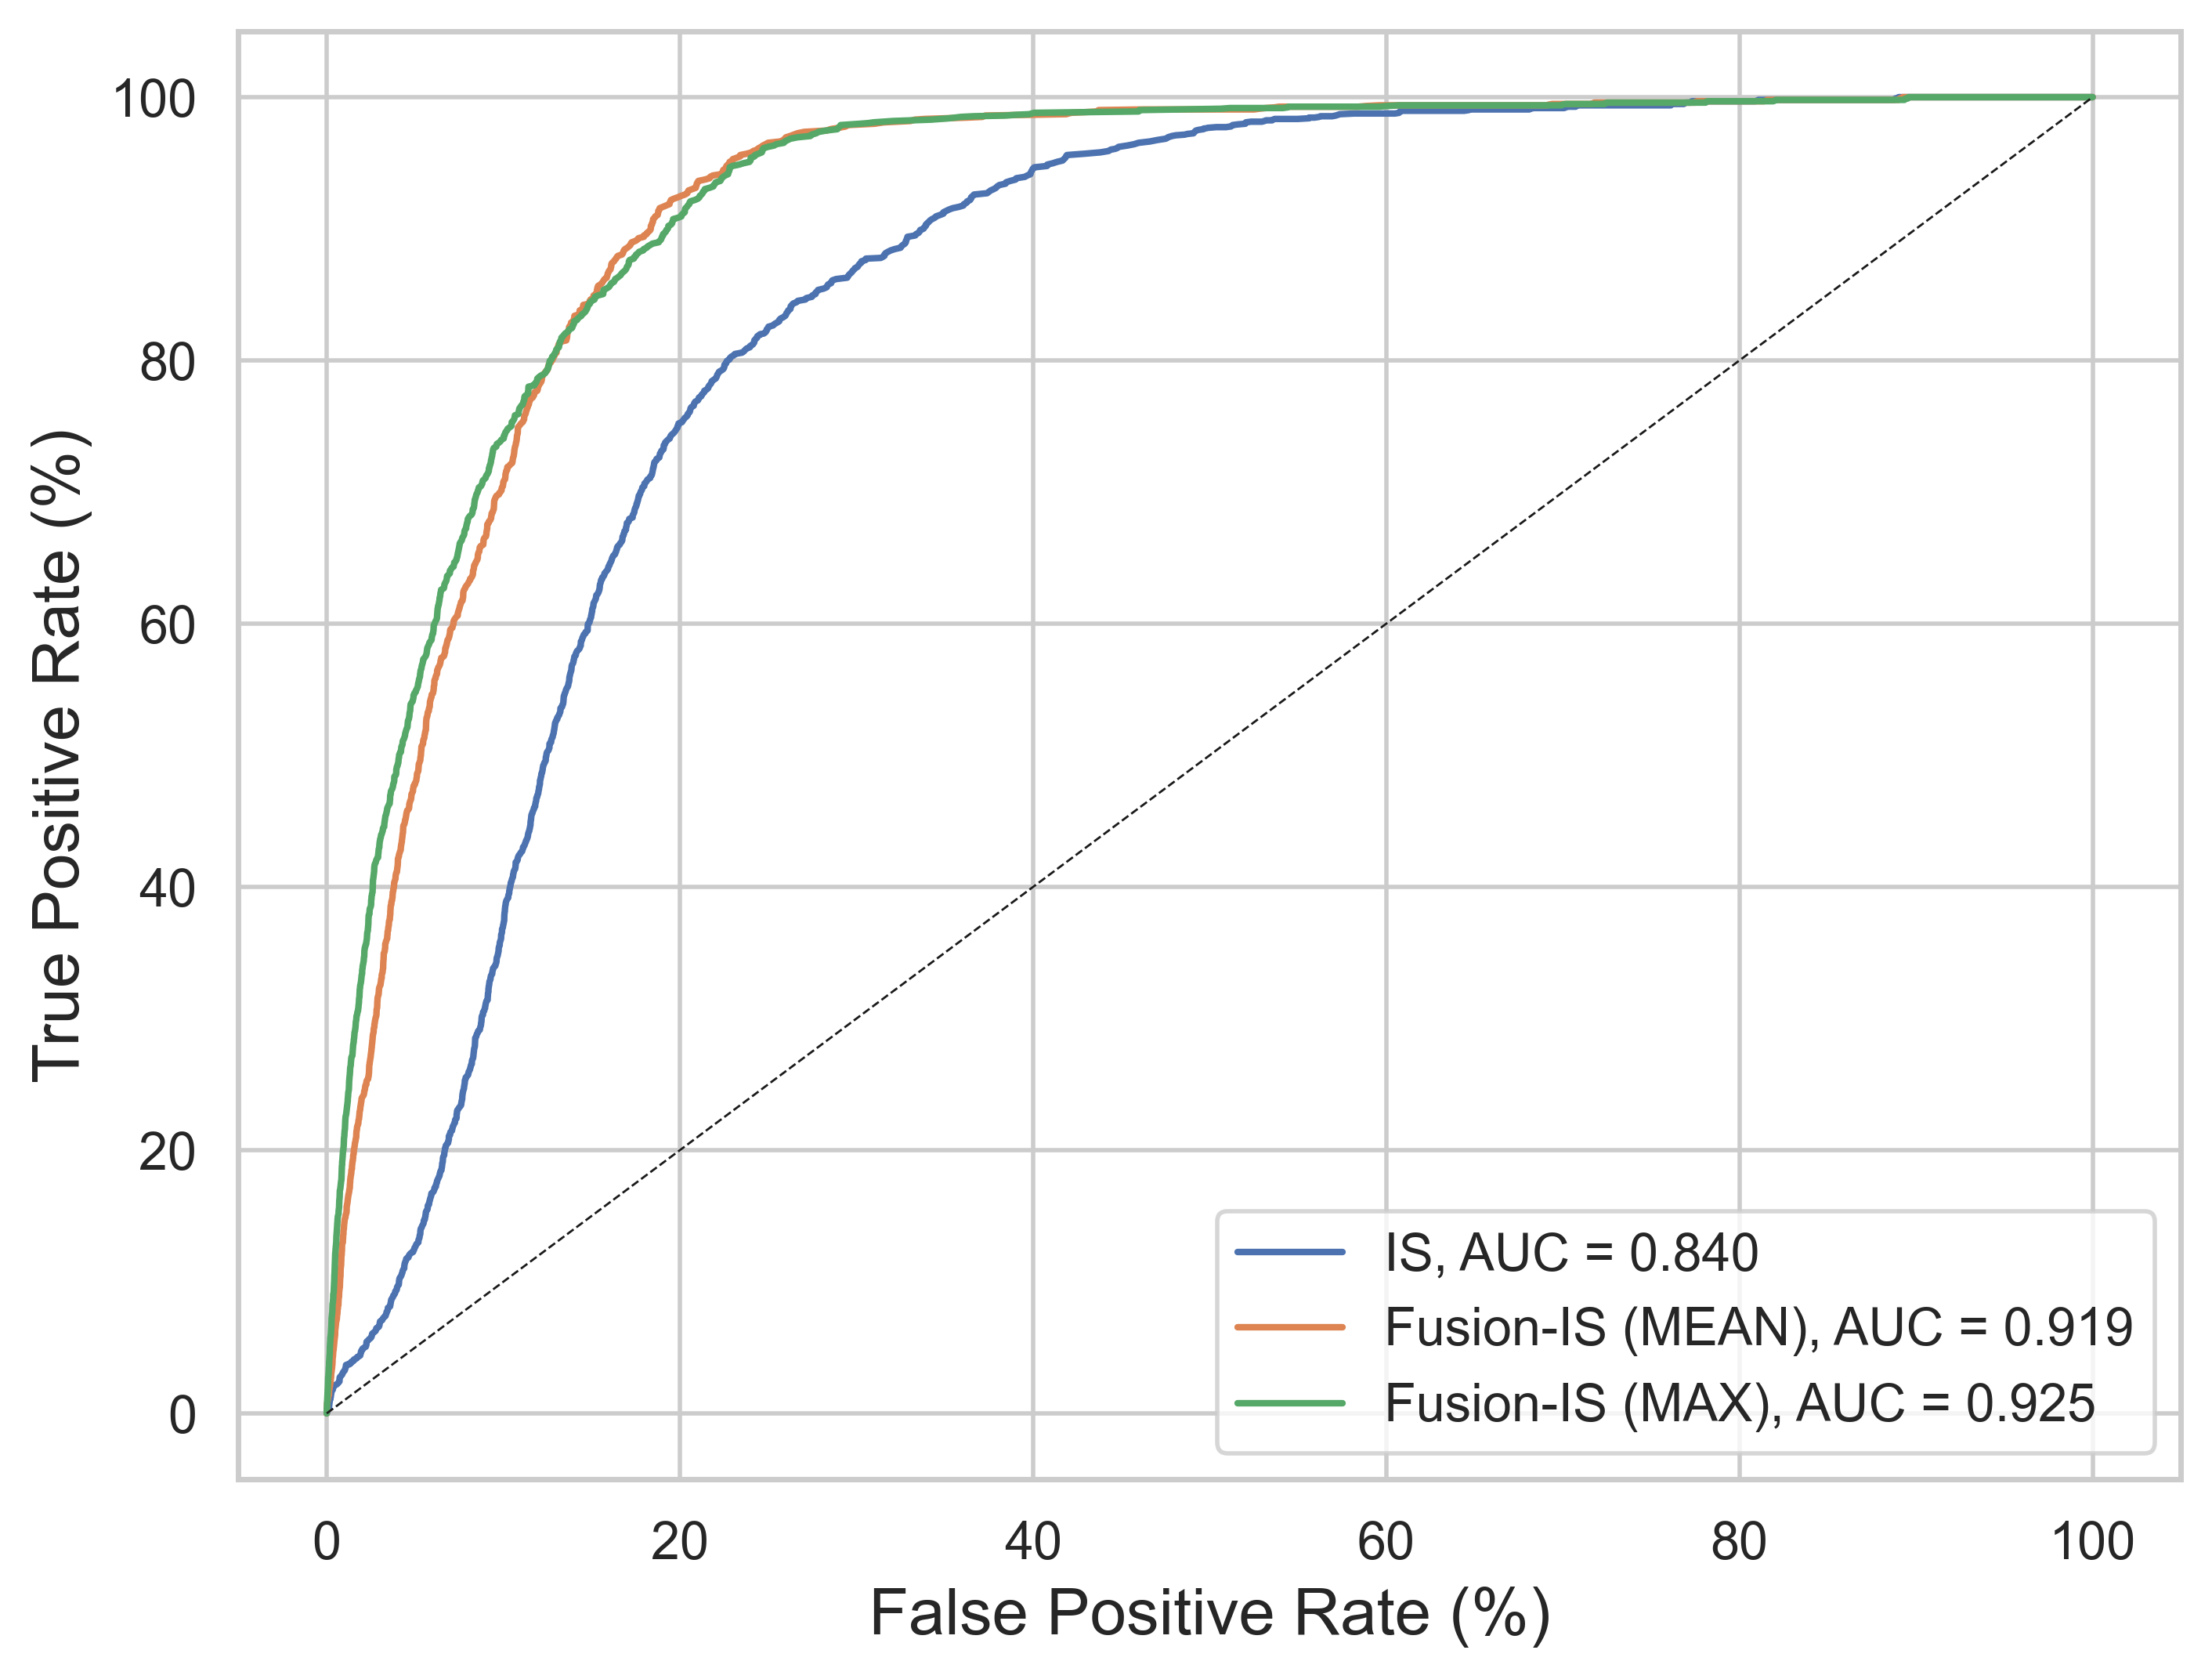

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6), dpi=400)

# 第一條線：Isolation Score
fpr, tpr, _ = roc_curve(scores_true, scores_prediction_trans)
auc_score = roc_auc_score(scores_true, scores_prediction_trans)
sns.lineplot(x=fpr * 100, y=tpr * 100, label='IS, AUC = {:.3f}'.format(auc_score))

# 第二條線：Fusion-IS (Mean)
fpr2, tpr2, _ = roc_curve(scores_true, conbinedScore['conditionCombinedMean'])
auc_score2 = roc_auc_score(scores_true, conbinedScore['conditionCombinedMean'])
sns.lineplot(x=fpr2 * 100, y=tpr2 * 100, label='Fusion-IS (MEAN), AUC = {:.3f}'.format(auc_score2))

# 第三條線：Fusion-IS (Max)
fpr3, tpr3, _ = roc_curve(scores_true, conbinedScore['conditionCombinedMax'])
auc_score3 = roc_auc_score(scores_true, conbinedScore['conditionCombinedMax'])
sns.lineplot(x=fpr3 * 100, y=tpr3 * 100, label='Fusion-IS (MAX), AUC = {:.3f}'.format(auc_score3))

# 虛線：隨機猜測基準線
x = np.linspace(0, 100, 1000)
plt.plot(x, x, ls='--', lw=0.5, c='k')

# 圖表設定
plt.xlabel('False Positive Rate (%)', fontsize=15)
plt.ylabel('True Positive Rate (%)', fontsize=15)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 儲存
plt.savefig('IS.pdf', dpi=2000)
plt.show()
